## Install libraries if necessary

In [43]:
"""Comment out and run cell to install libraries"""
#!pip3 install ipympl
#!pip3 install ipywidgets
#!pip3 install matplotlib
#!pip3 install numpy
#!pip3 install pandas_datareader

'Comment out and run cell to install libraries'

## Import libraries

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
import datetime
import ipympl

## Functions to import price data and trading dates

In [45]:
def read_price_data(stock_symbol, start_date, end_date, interval):
    """Import price data from Yahoo Finance"""
    stock_data = web.get_data_yahoo(stock_symbol, start_date, end_date, interval=interval)
    price_series = stock_data.loc[:, 'Adj Close']
    price_series = price_series.fillna(method='ffill')

    return price_series

In [46]:
def get_date_list(stock_symbol, start_date, end_date, interval):
    """Generate list of trading dates"""
    stock_data = web.get_data_yahoo(stock_symbol, start_date, end_date, interval=interval)
    date_list = stock_data.index
    
    return date_list

## Import stock data

In [47]:
def getStockData(symbol):
    stock_symbol = symbol # Stock symbol

    # Set time period
    start_date = datetime.datetime(2022, 3, 29)
    end_date = datetime.datetime(2022, 9, 29)
    interval = 'd' # Date interval, by default daily ('d')

    # Import price series and list of trading days
    try:
        date_list = get_date_list(stock_symbol, start_date, end_date, interval=interval)
        price_series = read_price_data(stock_symbol, start_date, end_date, interval=interval)
    except:
        print('Import failed')

    return date_list, price_series

## Plot price series with annotations

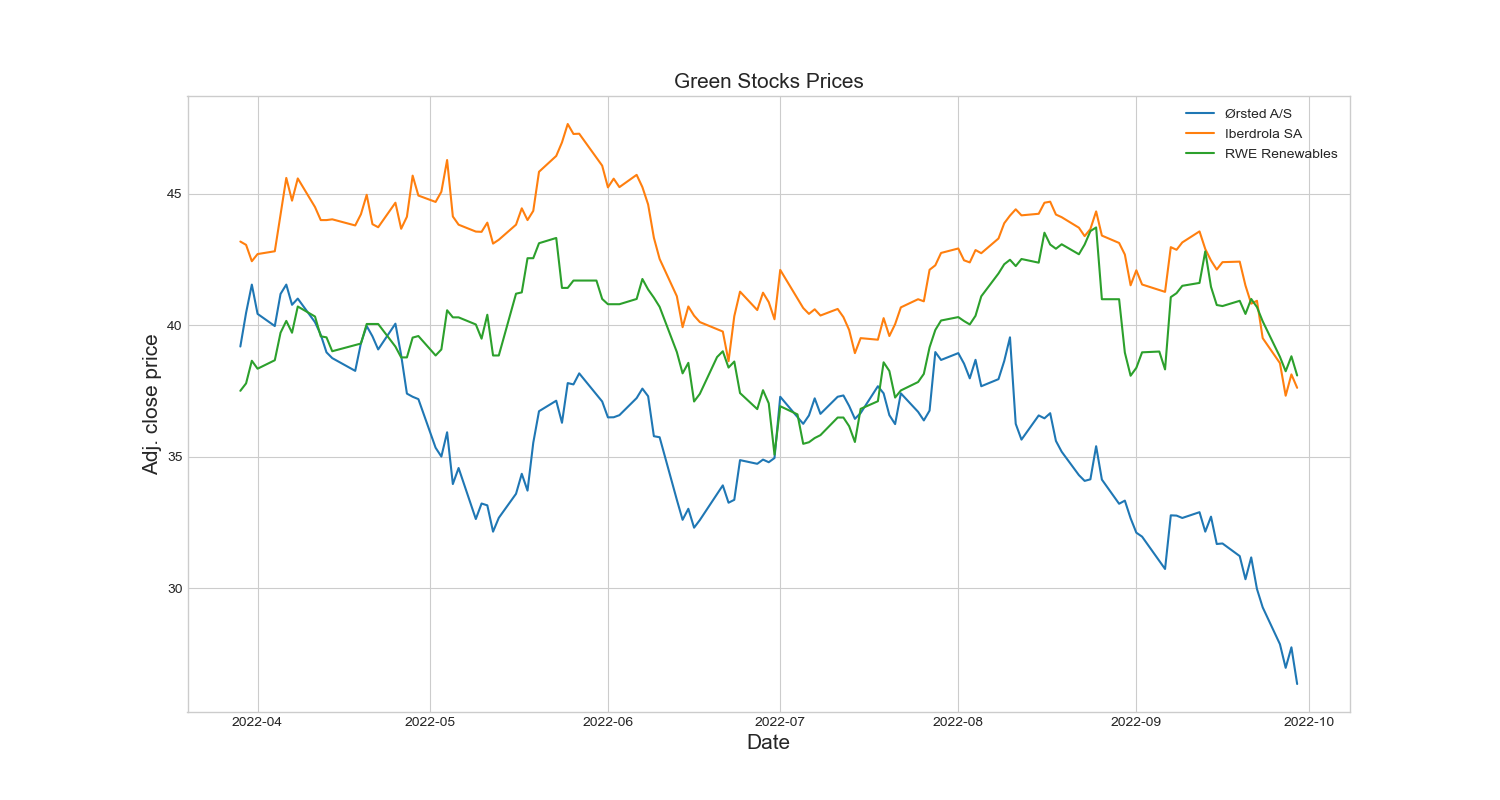

In [48]:
# Set to '%matplotlib widget' to create interactive plot (default is %matplotlib inline)
%matplotlib widget

fig, ax = plt.subplots(figsize=(15, 8))

#def getIndex(yyyy, m, d):
#    index = "none"
#    while index == "none":
#        for x in range(len(date_list)):
#           if (date_list[x] == datetime.datetime(yyyy, m, d)):
#                index = x
#                break
#            elif datetime.datetime(yyyy, m, d) <= date_list[0]:
#                return 0
#        d -= 1
#        if d == 0:
#            d = 28
#            m -= 1
#            if m == 0:
#                m = 12
#                yyyy -= 1
#    return index


#def makeEvent(yyyy, m, d, text):
#    index = getIndex(yyyy, m, d)
#    ax.annotate(text,
#            xy=(date_list[index], price_series[index]),
#            xycoords='data',
#            bbox=dict(boxstyle="square", fc="none", ec="gray"),
#            xytext=(0, 80),
#            textcoords='offset points',
#            arrowprops=dict(arrowstyle='->', color='gray'),
#            va='center',
#            ha='left',
#            fontsize=8)

# Set gridlines
plt.style.use('seaborn-whitegrid')

# Set options for interactive plot
fig.canvas.toolbar_visible = True
fig.canvas.resizable = True

# Set labels
plt.title('Green Stocks Prices', fontdict = {'fontsize' : 15})
plt.xlabel('Date', fontdict = {'fontsize' : 15})
plt.ylabel('Adj. close price', fontdict = {'fontsize' : 15})

# Plot annotated price series
ØrstedData = getStockData("DNNGY")
IberdrolaData = getStockData("IBDRY")
RWEData = getStockData("RWE.DE")
plt.plot(ØrstedData[0], ØrstedData[1], label="Ørsted A/S")
plt.plot(IberdrolaData[0], IberdrolaData[1], label="Iberdrola SA")
plt.plot(RWEData[0], RWEData[1], label="RWE Renewables")
plt.legend()
plt.show()